/home/mahi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:81: ComplexWarning: Casting complex values to real discards the imaginary part


for n= 0 time taken 0.004462226231892904 minute


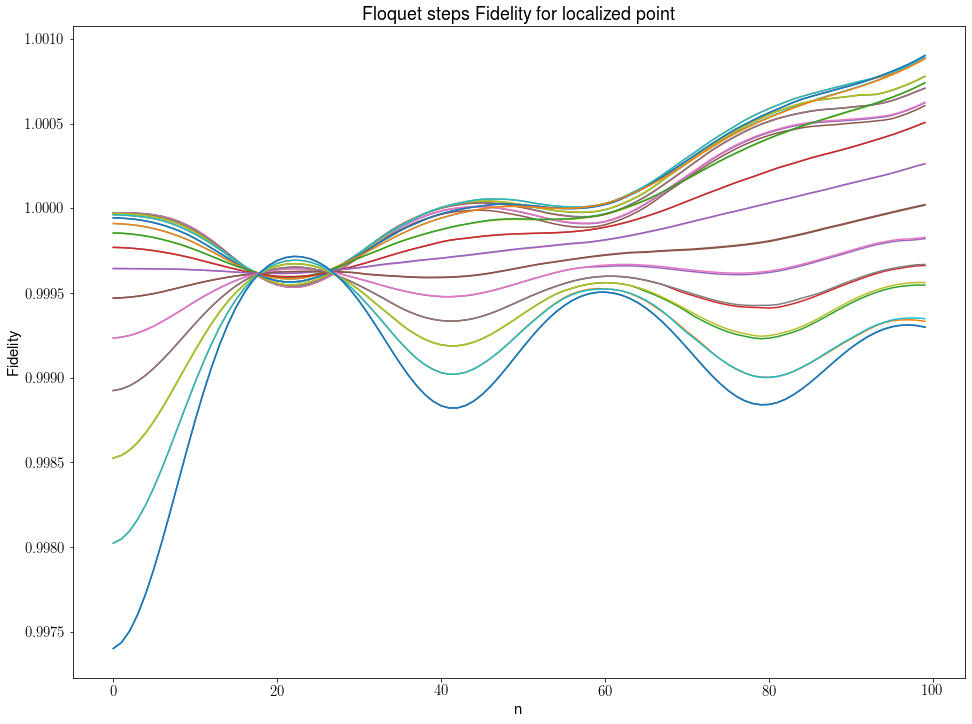

total time taken 7.151453403631846 minute


In [104]:
# When it is not the localization point

import numpy as np
from odeintw import odeintw
import matplotlib.pyplot as plt
from multiprocessing import Pool
from numpy.linalg import multi_dot, norm, eig
from scipy.special import jn_zeros
import math
import time
from collections import Counter
start = time.time()

plt.rcParams.update({
    #"figure.figsize": (16, 12),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 15,
    "font.sans-serif": ["Helvetica"]})
freezing_pts = jn_zeros(0, 5)

N = 30
#fidelity = np.zeros((ns[-1]+1,len(fiedl_state_no)))
kacN = 2/(N-1)
h0 = 0.1
omega = 90
w = omega
fiedl_state_no = [0,N-1]
# Number of floquet time periods
ns = np.arange(100)

h = 2.404 * N * omega/4.0
#h = 3.0 * N * omega/4.0
H1 = np.zeros((N+1,N+1))
fidelity = np.zeros((ns[-1]+1,N+1))

plotname = 'fidelity_' + str(N) +'Localized_point_.jpeg'

def delta_func(x,y):
        if ( x == y ):
            return 1.0
        else:
            return 0.0
        
def find_nearest(a, a0):
    "Element in nd array `a` closest to the scalar value `a0`"
    idx = np.abs(a - a0).argmin()
    return a.flat[idx]

def mode_value(sample):
    c = Counter(sample)
    return [k for k, v in c.items() if v == c.most_common(1)[0][1]]
        
def floq_jac(psi0, t, h, h0, H1, H0, w):    
    drive = h0 + h * t * np.cos(w * t)
    jac = 1j * (H0 + drive * H1)/N    
    return jac
        
def floq_func(psi0, t, h, h0, H1, H0, w):
    floq_h = np.dot(floq_jac(psi0, t, h, h0, H1, H0, w), psi0)
    return floq_h

if __name__ == '__main__':
    spin = 0.5 * np.arange(N+1)[-1]
    s = np.arange(-spin,spin+1) 
    H0 = np.diagflat(s **2 * kacN)  
    for i in range(N+1):
        for j in range(N+1):
            H1[i][j] = (np.sqrt(spin * (spin+1) - s[i] * (s[i]+1)) * delta_func(s[j],s[i]+1)\
                              + np.sqrt(spin * (spin+1) - s[i] * (s[i]-1)) * delta_func(s[j],s[i]-1))    
    
    psi = np.eye(N+1) + 1j * np.zeros((N+1,N+1))
    for n in ns:
        start1 = time.time()
        T = 2 * np.pi/w                                  
        tsteps =  200
        t = np.linspace(n * T, (n+1) * T, tsteps)        
        for m in np.arange(N+1):
            psi0 = psi[m]
            psi_t = odeintw(floq_func,psi0,t,args=(h, h0, H1, H0, w))  
            fidelity[n][m] = (np.dot(np.conjugate(psi0).T, psi_t[-1]))**2
            psi[m] = psi_t[-1]
        if(n==0):
            print('for n=',n,'time taken',(time.time()-start1)/60,'minute')
    
    for i in np.arange(N+1):
        plt.plot(ns, fidelity[:,i])
    plt.xlabel('n')
    plt.ylabel('Fidelity')
    plt.title('Floquet steps Fidelity  for localized point')
    plt.savefig(plotname, dpi = 300)
    plt.show()
    
    print('total time taken',(time.time()-start)/60,'minute')

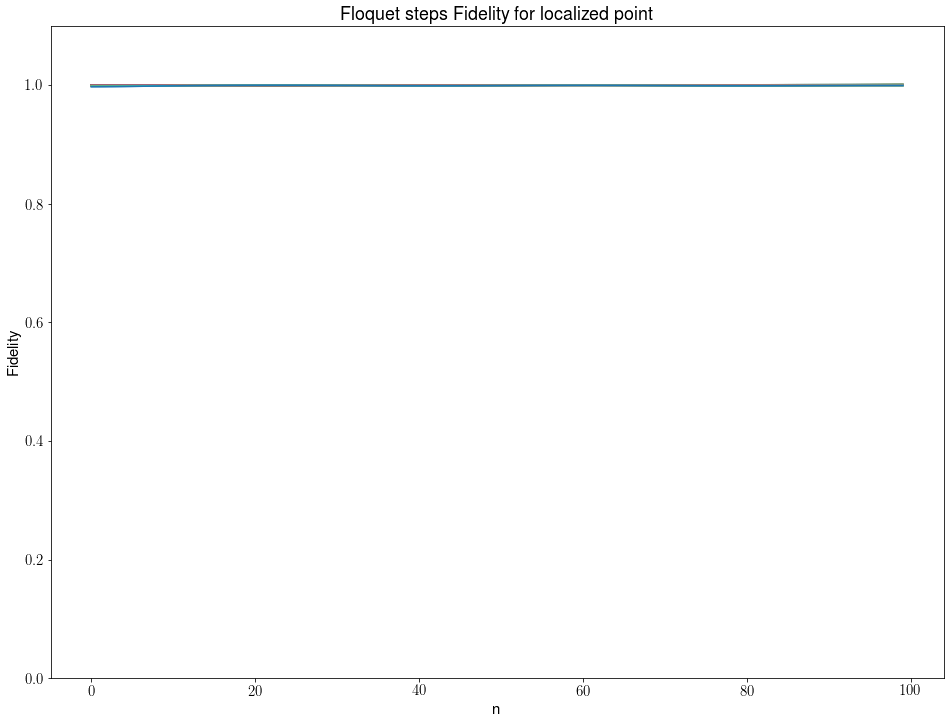

In [105]:
    for i in np.arange(N+1):
        plt.plot(ns, fidelity[:,i])
    plt.xlabel('n')
    plt.ylabel('Fidelity')
    plt.title('Floquet steps Fidelity  for localized point')
    plt.ylim(0.0,1.1)
    plt.show()

In [107]:
np.dot(np.conjugate(psi0).T,psi0)

(0.999884440258324+0j)

/home/mahi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:81: ComplexWarning: Casting complex values to real discards the imaginary part


for n= 0 time taken 0.004673278331756592 minute


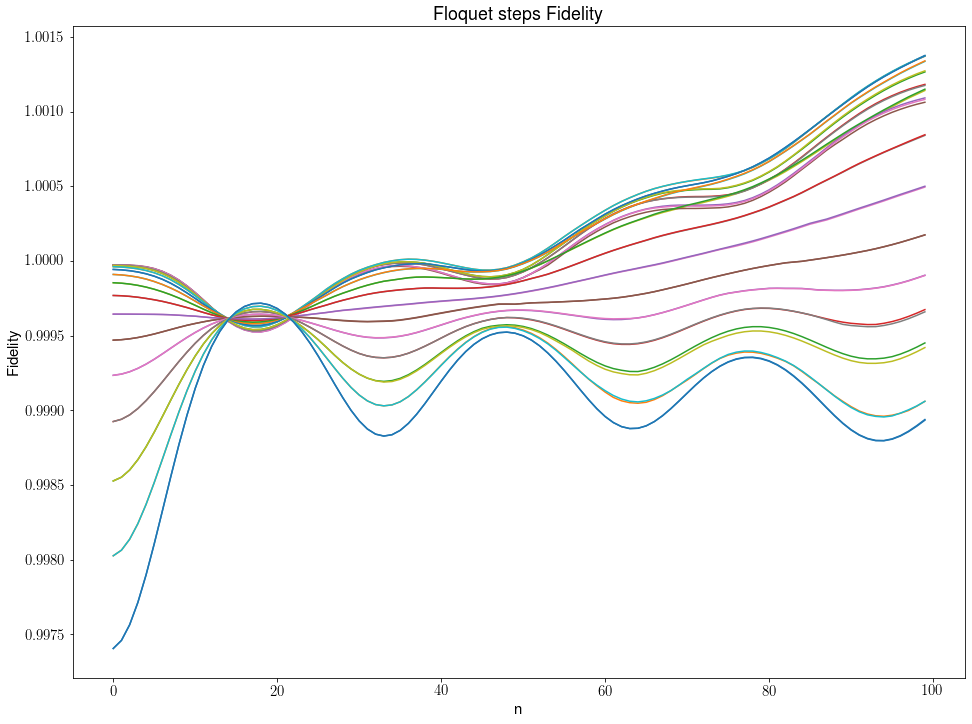

total time taken 8.641100875536601 minute


In [108]:
# When it is not the localization point

import numpy as np
from odeintw import odeintw
import matplotlib.pyplot as plt
from multiprocessing import Pool
from numpy.linalg import multi_dot, norm, eig
from scipy.special import jn_zeros
import math
import time
from collections import Counter
start = time.time()

plt.rcParams.update({
    #"figure.figsize": (16, 12),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 15,
    "font.sans-serif": ["Helvetica"]})
freezing_pts = jn_zeros(0, 5)

N = 30
#fidelity = np.zeros((ns[-1]+1,len(fiedl_state_no)))
kacN = 2/(N-1)
h0 = 0.1
omega = 90
w = omega
fiedl_state_no = [0,N-1]
# Number of floquet time periods
ns = np.arange(100)

#h = 2.404 * N * omega/4.0
h = 3.0 * N * omega/4.0
H1 = np.zeros((N+1,N+1))
fidelity = np.zeros((ns[-1]+1,N+1))

plotname = 'fidelity_' + str(N) +'Nonlocalized_point_.jpeg'

def delta_func(x,y):
        if ( x == y ):
            return 1.0
        else:
            return 0.0
        
def find_nearest(a, a0):
    "Element in nd array `a` closest to the scalar value `a0`"
    idx = np.abs(a - a0).argmin()
    return a.flat[idx]

def mode_value(sample):
    c = Counter(sample)
    return [k for k, v in c.items() if v == c.most_common(1)[0][1]]
        
def floq_jac(psi0, t, h, h0, H1, H0, w):    
    drive = h0 + h * t * np.cos(w * t)
    jac = 1j * (H0 + drive * H1)/N    
    return jac
        
def floq_func(psi0, t, h, h0, H1, H0, w):
    floq_h = np.dot(floq_jac(psi0, t, h, h0, H1, H0, w), psi0)
    return floq_h

if __name__ == '__main__':
    spin = 0.5 * np.arange(N+1)[-1]
    s = np.arange(-spin,spin+1) 
    H0 = np.diagflat(s **2 * kacN)  
    for i in range(N+1):
        for j in range(N+1):
            H1[i][j] = (np.sqrt(spin * (spin+1) - s[i] * (s[i]+1)) * delta_func(s[j],s[i]+1)\
                              + np.sqrt(spin * (spin+1) - s[i] * (s[i]-1)) * delta_func(s[j],s[i]-1))    
    
    psi = np.eye(N+1) + 1j * np.zeros((N+1,N+1))
    for n in ns:
        start1 = time.time()
        T = 2 * np.pi/w                                  
        tsteps =  200
        t = np.linspace(n * T, (n+1) * T, tsteps)        
        for m in np.arange(N+1):
            psi0 = psi[m]
            psi_t = odeintw(floq_func,psi0,t,args=(h, h0, H1, H0, w))  
            fidelity[n][m] = (np.dot(np.conjugate(psi0).T, psi_t[-1]))**2
            psi[m] = psi_t[-1]
        if(n==0):
            print('for n=',n,'time taken',(time.time()-start1)/60,'minute')
    
    for i in np.arange(N+1):
        plt.plot(ns, fidelity[:,i])
    plt.xlabel('n')
    plt.ylabel('Fidelity')
    plt.title('Floquet steps Fidelity')
    plt.savefig(plotname, dpi = 300)
    plt.show()
    
    print('total time taken',(time.time()-start)/60,'minute')

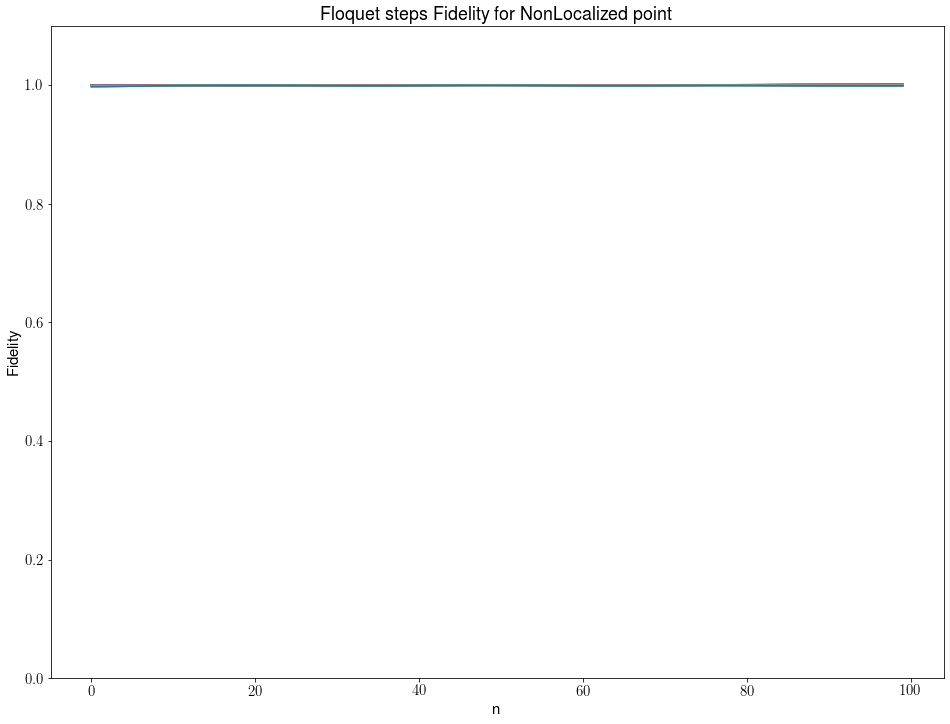

In [110]:
    for i in np.arange(N+1):
        plt.plot(ns, fidelity[:,i])
    plt.xlabel('n')
    plt.ylabel('Fidelity')
    plt.title('Floquet steps Fidelity  for NonLocalized point')
    plt.ylim(0.0,1.1)
    plt.show()

In [90]:
h = 2.404 * N * omega/4
print(h)

1622.7


In [91]:
print('hello')

hello
